## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил: Вячеслав Дыренков 

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights, marks):
    return round(sum(weights*marks))

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8.0

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [4]:
def change_array(array, number):
    array[::3]=number
    return(array)

In [5]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [6]:
def find_close(array1, array2, precision):
    return np.nonzero((abs(array1-array2)<=precision))[0]

In [7]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6], dtype=int64)

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [8]:
def block_matrix(block):
    b=np.concatenate((block,block),axis=1)
    b=np.concatenate((b,b))
    return(b)

In [9]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [10]:
def diag_prod(matrix):
    return matrix.diagonal()[matrix.diagonal().nonzero()].prod()

In [11]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [12]:
def normalize(matrix):
    return(np.around(((matrix-matrix.mean(axis=0))/matrix.std(axis=0)),2))

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.71, -0.39,  0.46],
       [-1.41,  1.37,  0.93],
       [ 0.71, -0.98, -1.39]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [18]:
def antiderivative(coefs):
    a=np.polyint(coefs)
    a[-1]=228
    return a

In [19]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([  1.,   2.,   0.,   1., 228.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [16]:
def make_symmetric(matrix):
    return np.tril(matrix.T,-1)+matrix

In [17]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [20]:
def construct_matrix(m, a, b):
    aa=np.arange(a,b+1)
    aaa=np.array(list(aa)*m)
    return(aaa.reshape(m,len(aa)))
    

In [21]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [22]:
def cosine_similarity(vec1, vec2):
    return np.inner(vec1,vec2)/((sum(vec1**2)**0.5)*sum(vec2**2)**0.5)

In [23]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [25]:
data=pd.read_csv('train.csv')
data.head()
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId    вещественный
Survived       бинарный
Pclass         категориальный
Name           другое
Sex            бинарный
Age            вещественный
SibSp          вещественный
Ticket         другое
Fare           вещественный
Cabin          категориальный
Embarked       категориальный

1) Найти зависимость (если есть) вероятности выживание от количества родственников на корабле
2) Предсказать умрет пассажир или нет
3) 


"""

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [26]:
data=pd.DataFrame(data)
data['Survived'].value_counts()[1]/len(data.index)

0.3838383838383838

In [27]:
print('male =',len(data[(data['Survived']==1) & (data["Sex"]=='male')].index))
print('female =',len(data[(data['Survived']==1) & (data["Sex"]=='female')].index))

male = 109
female = 233


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [28]:
temp=data.Pclass.value_counts()
temp

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
temp.idxmax()

3

In [30]:
tmp=data[data.Pclass==temp.idxmax()].Sex.value_counts().idxmax()
tmp

'male'

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [31]:
print(data.Fare.describe().min(),data.Fare.describe().mean(),data.Fare.describe().max())

0.0 192.32392957071943 891.0


In [32]:
d=data[data.Embarked=='S']
print(d.Fare.describe().min(),d.Fare.describe().mean(),d.Fare.describe().max())

0.0 127.36472564514537 644.0


Text(0,0.5,'Total number')

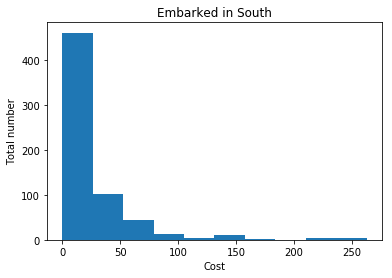

In [33]:
a=data[data.Embarked=='S'].Fare.plot.hist()
a.set_title('Embarked in South')
a.set_xlabel('Cost')
a.set_ylabel('Total number')

Text(0,0.5,'Total number')

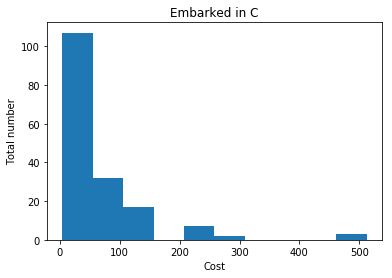

In [34]:
a=data[data.Embarked=='C'].Fare.plot.hist()
a.set_title('Embarked in C')
a.set_xlabel('Cost')
a.set_ylabel('Total number')

Text(0,0.5,'Total number')

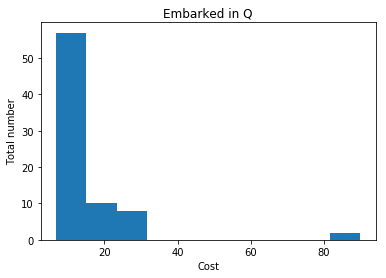

In [35]:
a=data[data.Embarked=='Q'].Fare.plot.hist()
a.set_title('Embarked in Q')
a.set_xlabel('Cost')
a.set_ylabel('Total number')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [148]:
data_n=data.drop(['PassengerId', 'Name','Parch','Ticket'], axis=1)
data_n.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,New_1
0,0,3,male,22.0,1,7.2500,NaN,S,Braund
1,1,1,female,38.0,1,71.2833,C85,C,Cumings
2,1,3,female,26.0,0,7.9250,NaN,S,Heikkinen
3,1,1,female,35.0,1,53.1000,C123,S,Futrelle
4,0,3,male,35.0,0,8.0500,NaN,S,Allen


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [40]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [41]:
### Age, Cabin, Embarked имеют пропуски

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [64]:
len(data_n)


891

In [80]:
data_n.update(data_n.loc[data_n.Cabin.isnull(),'Cabin'].fillna('outside'))
data_n.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
881,0,3,male,33.0,0,7.8958,outside,S
882,0,3,female,22.0,0,10.5167,outside,S
883,0,2,male,28.0,0,10.5000,outside,S
884,0,3,male,25.0,0,7.0500,outside,S
885,0,3,female,39.0,0,29.1250,outside,Q
886,0,2,male,27.0,0,13.0000,outside,S
887,1,1,female,19.0,0,30.0000,B42,S
888,0,3,female,NaN,1,23.4500,outside,S
889,1,1,male,26.0,0,30.0000,C148,C
890,0,3,male,32.0,0,7.7500,outside,Q


In [81]:

data_n.update(data_n.loc[data_n.Age.isnull(),'Age'].fillna(data_n.Age.median()))
data_n.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0,3,male,22.0,1,7.2500,outside,S
1,1,1,female,38.0,1,71.2833,C85,C
2,1,3,female,26.0,0,7.9250,outside,S
3,1,1,female,35.0,1,53.1000,C123,S
4,0,3,male,35.0,0,8.0500,outside,S


In [82]:
data_n['Fare'][data_n.Embarked.isnull()]

61     80.0
829    80.0
Name: Fare, dtype: float64

In [92]:
data_n.Fare=pd.to_numeric(data_n.Fare)
emb=abs(data_n.groupby('Embarked').mean()['Fare']-80).idxmin()
data_n.update(data_n.loc[data_n.Embarked.isnull(),'Embarked'].fillna(emb))
data_n.head(62)

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,0,3,male,22.0,1,7.2500,outside,S
1,1,1,female,38.0,1,71.2833,C85,C
2,1,3,female,26.0,0,7.9250,outside,S
3,1,1,female,35.0,1,53.1000,C123,S
4,0,3,male,35.0,0,8.0500,outside,S
5,0,3,male,28.0,0,8.4583,outside,Q
6,0,1,male,54.0,0,51.8625,E46,S
7,0,3,male,2.0,3,21.0750,outside,S
8,1,3,female,27.0,0,11.1333,outside,S
9,1,2,female,14.0,1,30.0708,outside,C


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [93]:
data_n['Fare'] = data_n['Fare'].apply(lambda x: float(x)) 
data_n['Age'] = data_n['Age'].apply(lambda x: float(x)) 

In [94]:
data.corrwith(data.Fare).Age

0.09606669176903891

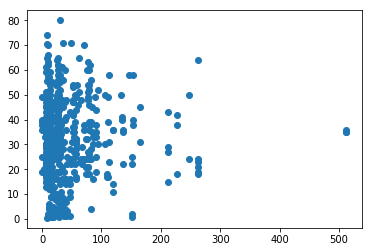

In [95]:
plt.scatter(data.Fare, data.Age)

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [104]:
data.corrwith(data.Survived).Fare

0.25730652238496227

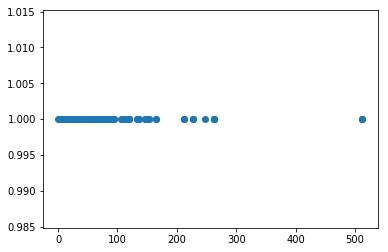

In [98]:
a=pd.concat([data.Fare,data.Survived[data.Survived==1]],axis=1)
#a.sort_values(by=['Fare'])
plt.scatter(a.Fare,a.Survived)


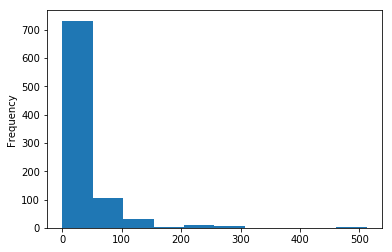

In [100]:
data.Fare.plot.hist()

In [101]:
data.Fare[data.Survived==1].median()

26.0

In [ ]:
#как видно из графика "корреляции" и средней цены билета выжившего, ответ -- нет

In [106]:
data.corrwith(data.Survived).Pclass

-0.33848103596101475

In [114]:
data_n.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [115]:
data.Pclass[data.Survived==1].value_counts(normalize=True)

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [ ]:
#видно, что выживаемость тех, кто был в 1 классе выше

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [103]:
data_n=data_n.assign(New_1=1+data_n.SibSp)
data_n.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,New_1
0,0,3,male,22.0,1,7.2500,outside,S,2
1,1,1,female,38.0,1,71.2833,C85,C,2
2,1,3,female,26.0,0,7.9250,outside,S,1
3,1,1,female,35.0,1,53.1000,C123,S,2
4,0,3,male,35.0,0,8.0500,outside,S,1


In [ ]:
#признак -- цена билета ниже средней

In [118]:
data_n=data_n.assign(Below_avg_fare=data_n.Fare<data.Fare.median())
data_n.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,New_1,Below_avg_fare
0,0,3,male,22.0,1,7.2500,outside,S,2,True
1,1,1,female,38.0,1,71.2833,C85,C,2,False
2,1,3,female,26.0,0,7.9250,outside,S,1,True
3,1,1,female,35.0,1,53.1000,C123,S,2,False
4,0,3,male,35.0,0,8.0500,outside,S,1,True


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [120]:
data['New_1'] = data['Name'].str.extract(r'(.*,)', expand=False)
data['New_1'] = data['New_1'].map(lambda x: str(x)[:-1])
data.New_1.value_counts().idxmax()

'Andersson'

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,New_1,Below_avg_fare
0,0,3,male,22.0,1,7.2500,outside,S,2,True
1,1,1,female,38.0,1,71.2833,C85,C,2,False
2,1,3,female,26.0,0,7.9250,outside,S,1,True
3,1,1,female,35.0,1,53.1000,C123,S,2,False
4,0,3,male,35.0,0,8.0500,outside,S,1,True


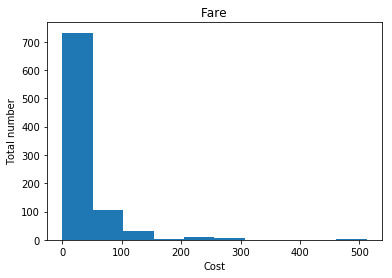

In [126]:
a=data.Fare.plot.hist()
a.set_title('Fare')
a.set_xlabel('Cost')
a.set_ylabel('Total number')
data_n.head()

Text(0,0.5,'Total number')

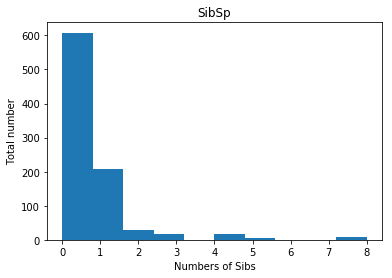

In [123]:
a=data.SibSp.plot.hist()
a.set_title('SibSp')
a.set_xlabel('Numbers of Sibs')
a.set_ylabel('Total number')


Text(0,0.5,'Total number')

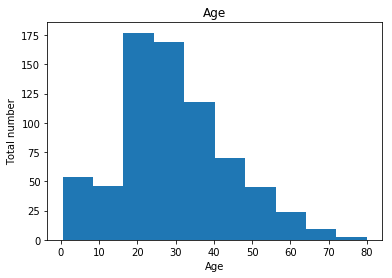

In [124]:
a=data.Age.plot.hist()
a.set_title('Age')
a.set_xlabel('Age')
a.set_ylabel('Total number')


In [150]:
data_temp=data_n.drop(['Survived','Pclass','Sex','Cabin','Embarked','New_1'],axis=1)
data_nr=(data_temp-data_temp.mean(axis=0))/data_temp.std(axis=0)
data_nr.head()
#data_n=data_n.drop(['Age','Fare','SibSp'],axis=1)
data_nr.head()


,Age,SibSp,Fare
0,-0.530005,0.432550,-0.502163
1,0.571430,0.432550,0.786404
2,-0.254646,-0.474279,-0.488580
3,0.364911,0.432550,0.420494
4,0.364911,-0.474279,-0.486064


,Survived,Pclass,Sex,Cabin,Embarked,New_1
0,0,3,male,NaN,S,Braund
1,1,1,female,C85,C,Cumings
2,1,3,female,NaN,S,Heikkinen
3,1,1,female,C123,S,Futrelle
4,0,3,male,NaN,S,Allen


### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [164]:
data_n.head()
#категориальные Embarked, Sex(секс) и Pclass

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked,New_1
0,0,3,male,22.0,1,7.2500,NaN,S,Braund
1,1,1,female,38.0,1,71.2833,C85,C,Cumings
2,1,3,female,26.0,0,7.9250,NaN,S,Heikkinen
3,1,1,female,35.0,1,53.1000,C123,S,Futrelle
4,0,3,male,35.0,0,8.0500,NaN,S,Allen


In [166]:
data_n=data_n.assign(Embarked_S=data_n.Embarked=='S')
data_n=data_n.assign(Embarked_C=data_n.Embarked=='C')
data_n=data_n.assign(Embarked_Q=data_n.Embarked=='Q')

data_n[['Embarked_S','Embarked_C','Embarked_Q']]*=1
data_n=data_n.assign(Pclass1=data_n.Pclass==1)
data_n=data_n.assign(Pclass2=data_n.Pclass==2)
data_n=data_n.assign(Pclass3=data_n.Pclass==3)

data_n[['Pclass1','Pclass2','Pclass3']]*=1

data_n=data_n.assign(Sex_m=data_n.Sex=='male')
data_n=data_n.assign(Sex_f=data_n.Sex=='female')


data_n[['Sex_m','Sex_f']]*=1
data_n=data_n.drop(['Sex','Embarked','Pclass'],axis=1)
data_n.head()

,Survived,Age,SibSp,Fare,Cabin,New_1,Embarked_S,Embarked_C,Embarked_Q,Pclass1,Pclass2,Pclass3,Sex_m,Sex_f
0,0,22.0,1,7.2500,NaN,Braund,1,0,0,0,0,1,1,0
1,1,38.0,1,71.2833,C85,Cumings,0,1,0,1,0,0,0,1
2,1,26.0,0,7.9250,NaN,Heikkinen,1,0,0,0,0,1,0,1
3,1,35.0,1,53.1000,C123,Futrelle,1,0,0,1,0,0,0,1
4,0,35.0,0,8.0500,NaN,Allen,1,0,0,0,0,1,1,0
